### Customer Churn Analysis
##### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Getting Statistical information of the DataSet

In [3]:
df.shape

(7043, 21)

- we have 7043 rows and 21 columns 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- There is combination of int,object and float type data in the dataset
- The dependent varibale Churn is of object type and comes under classification problem

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df['SeniorCitizen'].unique()

array([0, 1])

In [7]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [8]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [10]:
print(f'The max tenurity of the customer in the data set is {max(df["tenure"].unique())}')
print(f'The min tenurity of the customer in the data set is {min(df["tenure"].unique())}')

The max tenurity of the customer in the data set is 72
The min tenurity of the customer in the data set is 0


In [11]:
len(df['MonthlyCharges'].unique())

1585

- There are 1585 values unique in the data set MonthlyCharges feature
--------------------------------------------------------------------------------------

* From the above lines of code we can consider SeniorCitizen feature as categeorical feature
* Monthly charges has unique data but with some good amount we can say it as oridinal classification data

#### Checking Categeorical variables

In [14]:
#checking for categeorical columns
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
print(f"- We have {len(features_list)} features with object type in the dataset")
features_list

- We have 18 features with object type in the dataset


['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

#### Now checking its unique type

In [15]:
# Lets find the unique values which are present in categeorical columns
for feature in features_list:
    print(feature)
    print(df[feature].value_counts())
    print('--------------------------------------')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
--------------------------------------
gender
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------------------------------


- Customer ID is unique ID generated to quickly identify Customer with out duplications
    * This is not useful for our model creation we can drop the feature
- Gender : Whether the customer is male or female
- Partner : This Feature Speaks about whether the customer has any partner or not
- Dependents: This Feature Speaks about whether the customer has any dependents or not
- PhoneService: Speaks about the customer has the phone service or not
- MultipleLines feature speaks about whether the customer has multiple lines or not
    * we have 3 unique values here(yes,no,No phone service)
    * The third variable no phone service belongs to Phone service feature here we need some analaysis.
- InternetService : Customers internet service provider
- OnlineSecurity : Speaks about whether the customer has online security or not.
- OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies has yes,no, no internet service.
    * I think most of the features id dependent with the internet service
- Contract: This Speaks about the subscriptions
- PaperlessBilling : Name itself says billing with out paper
- PaymentMethod: Mode of Payment
- TotalCharges

In [16]:
#### Dropping Customer ID column as it is not useful in model building
df.drop('customerID',axis=1,inplace=True)

#### Checking for any null values present in dataframe

<AxesSubplot:>

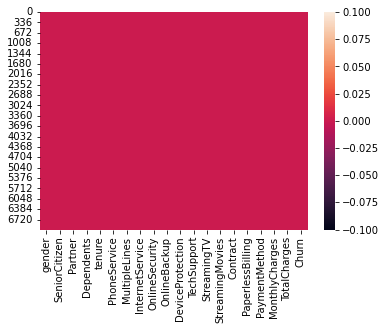

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- There are no NaN values present in the dataset

### Visualization
#### Univariate Analaysis

<AxesSubplot:xlabel='gender', ylabel='count'>

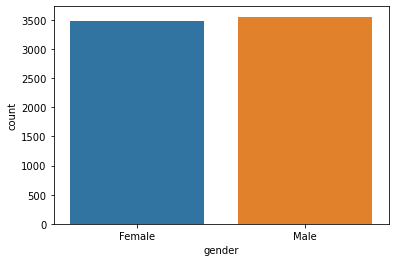

In [19]:
sns.countplot(df['gender'])

- There are same amount of data present in both variables we can say data is balanced

<AxesSubplot:xlabel='Partner', ylabel='count'>

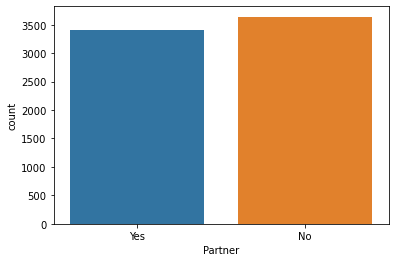

In [20]:
sns.countplot(df['Partner'])

- There are atmost same amount of data present in both variables we can say data is balanced,Compared to No we have less information for yes variable

([<matplotlib.patches.Wedge at 0x7f81442f5c70>,
 [Text(-0.05860659335486817, 1.0984376483056912, 'No'),
  Text(0.05860649051171347, -1.0984376537928315, 'Yes')],
 [Text(-0.031967232739019, 0.5991478081667406, '51.70%'),
  Text(0.031967176642752795, -0.5991478111597263, '48.30%')])

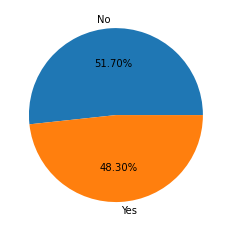

In [22]:
labels = ['No','Yes']
plt.pie(df['Partner'].value_counts(),autopct='%1.2f%%',labels=labels)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

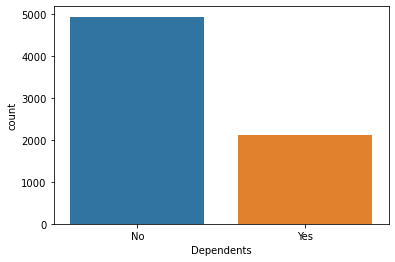

In [23]:
sns.countplot(df['Dependents'])

([<matplotlib.patches.Wedge at 0x7f8144c9cf40>,
 [Text(-0.6477143548699043, 0.8890816129554497, 'No'),
  Text(0.6477142716280732, -0.8890816735988404, 'Yes')],
 [Text(-0.35329873901994774, 0.48495360706660884, '70.04%'),
  Text(0.35329869361531263, -0.48495364014482195, '29.96%')])

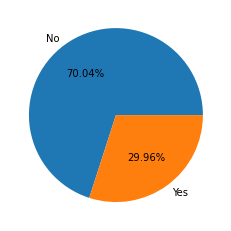

In [25]:
labels = ['No','Yes']
plt.pie(df['Dependents'].value_counts(),autopct='%1.2f%%',labels=labels)

- 70% of the data has no dependents

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

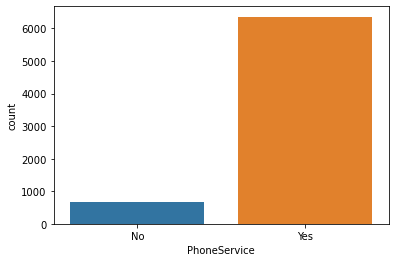

In [26]:
sns.countplot(df['PhoneService'])

([<matplotlib.patches.Wedge at 0x7f8144cb9790>,
 [Text(-1.0494915966975706, 0.3294956577273572, 'Yes'),
  Text(1.049491627547176, -0.3294955594668612, 'No')],
 [Text(-0.5724499618350385, 0.17972490421492213, '90.32%'),
  Text(0.5724499786620959, -0.1797248506182879, '9.68%')])

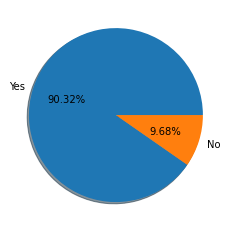

In [27]:
labels = ['Yes','No']
plt.pie(df['PhoneService'].value_counts(),autopct='%1.2f%%',labels=labels,shadow=True)

- 90.32% of people are have phone services
- 9.68 % of people are not using phone services

([<matplotlib.patches.Wedge at 0x7f8143ff6370>,
 [Text(0.06448547450707494, 1.0981082021265471, 'No'),
  Text(-0.39045359439184046, -1.0283705512248453, 'Yes'),
  Text(1.0494915658479562, -0.32949575598785064, 'No phone service')],
 [Text(0.035173895185677234, 0.5989681102508438, '48.13%'),
  Text(-0.21297468785009477, -0.5609293915771884, '42.18%'),
  Text(0.572449945007976, -0.17972495781155487, '9.68%')])

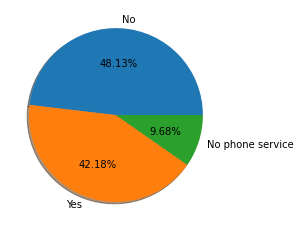

In [29]:
labels = ['No','Yes','No phone service']
plt.pie(df['MultipleLines'].value_counts(),autopct='%1.2f%%',labels=labels,shadow=True)

- MOstly 48.13% and 42.18% people are using multiple lines

([<matplotlib.patches.Wedge at 0x7f81234ccac0>,
 [Text(0.20752658810331015, 1.0802465992680557, 'Fiber optic'),
  Text(-0.8411049099748846, -0.7089023419457307, 'DSL'),
  Text(0.8548554654106661, -0.6922587184409551, 'No')],
 [Text(0.11319632078362371, 0.5892254177825758, '43.96%'),
  Text(-0.458784496349937, -0.38667400469767127, '34.37%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

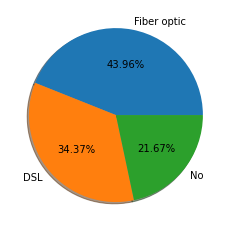

In [32]:
labels = ['Fiber optic','DSL','No']
plt.pie(df['InternetService'].value_counts(),autopct='%1.2f%%',labels=labels,shadow=True)

- Usage od Internet Services
    * Fiber optic : 43.96%
    * DSL : 34.37%
    * No : 21.67%

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

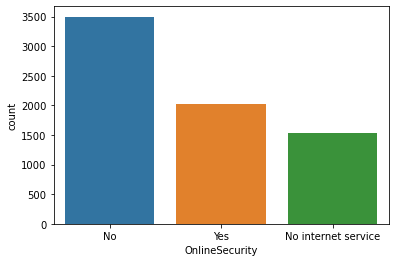

In [33]:
sns.countplot(df['OnlineSecurity'])

- Most of the people are not using online security

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

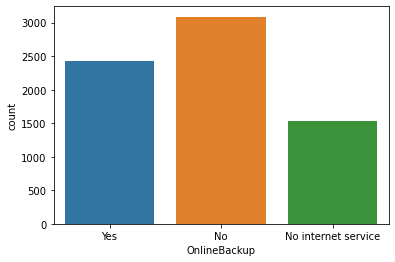

In [34]:
sns.countplot(df['OnlineBackup'])

- Most of the customers has no online backup
- Comapred to No there are alos customers who has online backup but comapred to No it is low

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

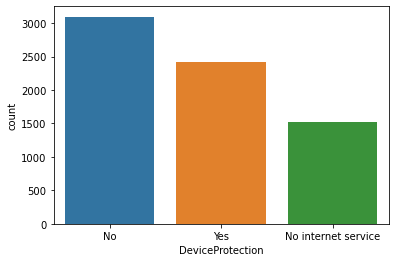

In [35]:
sns.countplot(df['DeviceProtection'])

- Most of the customers has no Device Protection
- Comapred to No there are also customers who has Device protection but comapred to No it is low

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

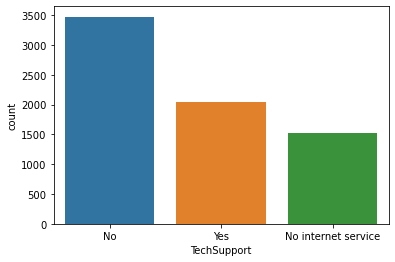

In [36]:
sns.countplot(df['TechSupport'])

([<matplotlib.patches.Wedge at 0x7f81452216a0>,
 [Text(0.023795397047164612, 1.0997425967376948, 'No'),
  Text(-0.7105891537173198, -0.8396803288271695, 'Yes'),
  Text(0.8548554654106661, -0.6922587184409551, 'No internet service')],
 [Text(0.012979307480271604, 0.5998595982205608, '49.31%'),
  Text(-0.38759408384581073, -0.45800745208754695, '29.02%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

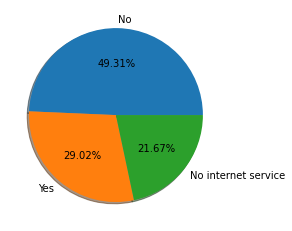

In [37]:
labels = ['No', 'Yes', 'No internet service']
plt.pie(df['TechSupport'].value_counts(),autopct='%1.2f%%',labels=labels,shadow=True)

- Most of the customers has no TechSupport plan
- Comapred to No there are also customers who has Techsupport but comapred to No it is low